In [44]:
# Importing libraries and data

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import math

heart = pd.read_csv("heart.csv")

null_values = heart.isnull().any().any()
print(null_values)

# Checking for null values...
# No null values!

False


In [45]:
heart.shape

# Check shape of dataset

(918, 12)

In [46]:
heart.drop_duplicates(inplace=True)
heart.shape

# Drop duplicates and check shape again to see if there were any duplicates.
# There were no duplicates in the first place.

(918, 12)

In [47]:
# Data inspection

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [48]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
# Statistical overview

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [50]:
heart.HeartDisease.value_counts()

# Check general spread of dependent variable being tested.
# The dependent variable is pretty evenly distrubted.

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [51]:
heart.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

# Looking at heart disease numbers per gender.
# At inital glance it's evident that sex plays a role in level of heart disease risk. 
# There are a lot more men than women in the dataset. However, the majority of men have heart disease, whereas the majority of women do not.

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [52]:
# Separating categorical and numeric features for further analysis

col = list(heart.columns)
categorical_features = []
numerical_features = []

for feature in col:
    if heart[feature].dtype in ['int64', 'float64']:  # Check if column is numerical
        if len(heart[feature].unique()) > 10:  # Numerical with more than 10 unique values
            numerical_features.append(feature)
        else:  # Numerical but has few unique values (likely categorical)
            categorical_features.append(feature)
    else:  # Non-numerical columns
        categorical_features.append(feature)

# Print the results to confirm features were categorized correctly
print('Categorical Features:', categorical_features)
print('Numerical Features:', numerical_features)

Categorical Features: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

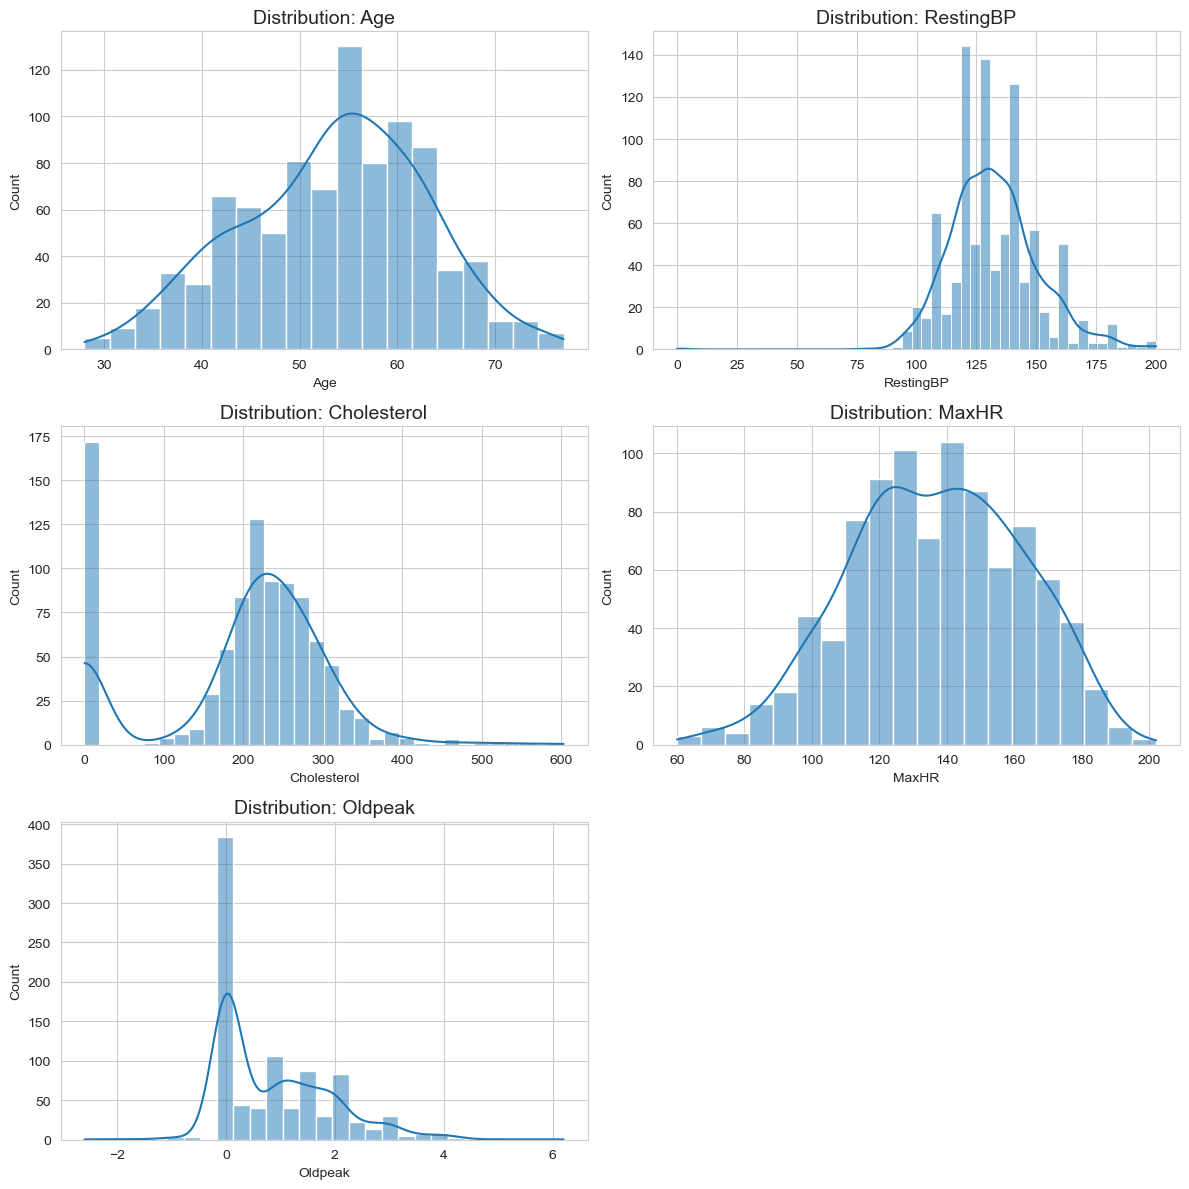

In [53]:
# Creating histograms for all numerical features to explore distribution of each

# Determine the number of numerical features
num_features = len(numerical_features)

# Dynamically calculate grid size e.g., 2x2, 3x3
rows = math.ceil(num_features / 2)  # 2 plots per row
cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(heart[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution: {feature}', fontsize=14)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Cholesterol's distriubtion is bimodal. 
# Oldpeak's distribution is sweked.
# All other distributions are normal.

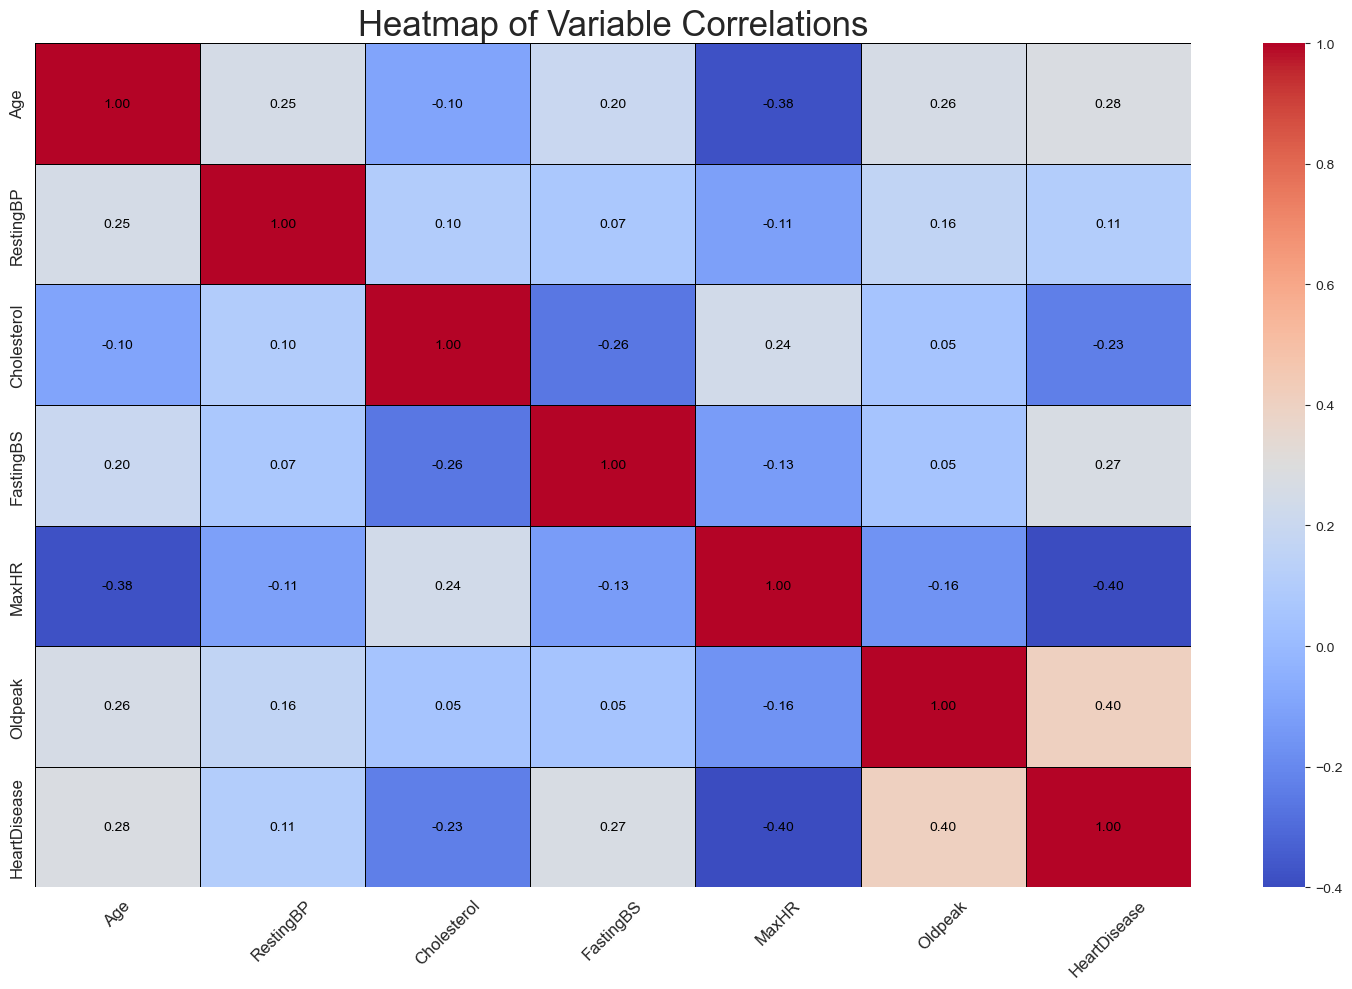

In [54]:
# Creating heatmap of variable correlations

numeric_heart = heart.select_dtypes(include=['number']) # Selecting only numeric vairables
correlation_matrix = numeric_heart.corr()

plt.figure(figsize=(15,10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='black')

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# The variables to show the most correlation with heart disease are:
# Oldpeak (positive correlation)
# Max heart rate (negative correlation)

# These variables correlate enough with heart disease to where they're also worth exploring:
# Cholesterol (negative correlation)
# Fasting BS (positive correlation)
# Age (positive correlation)

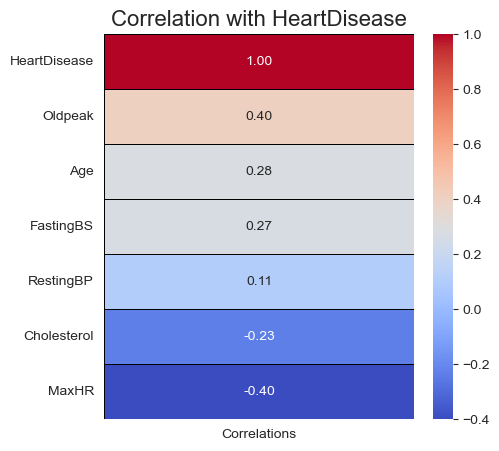

In [67]:
# Initially made big heatmap to see if there was any signifcant correlation between two independent variables.
# There is no significant correlation between any two independent variables;
# Making smaller heatmap now to more easily see the correlation values between heart disease specifically.

# Calculate correlations with 'HeartDisease'
corr = numeric_columns.corrwith(heart['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt=".2f")
plt.title('Correlation with HeartDisease', fontsize=16)
plt.show()

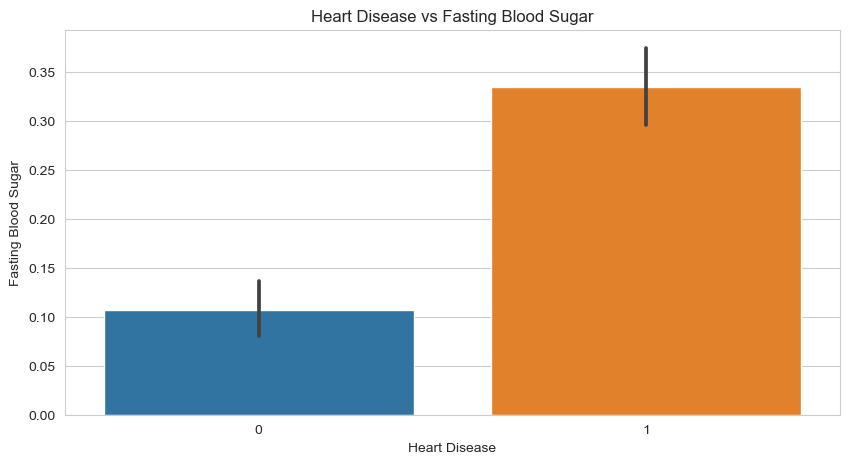

In [58]:
# Exploring distribution of fasting blood sugar for those with heart disease and those without.

plt.figure(figsize=(10,5))
sns.barplot(x='HeartDisease',y='FastingBS',data=heart)
plt.title('Heart Disease vs Fasting Blood Sugar')
plt.xlabel('Heart Disease')
plt.ylabel('Fasting Blood Sugar')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of maximum heart rate achieved by HeartDisease')

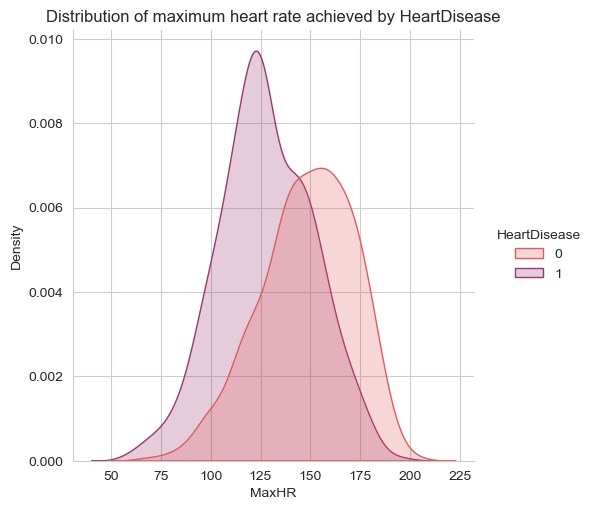

In [60]:
# Exploring distribution of max heart rate for those with heart disease and those without.

sns.displot(data=heart,x='MaxHR',hue='HeartDisease',palette='flare',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate achieved by HeartDisease')

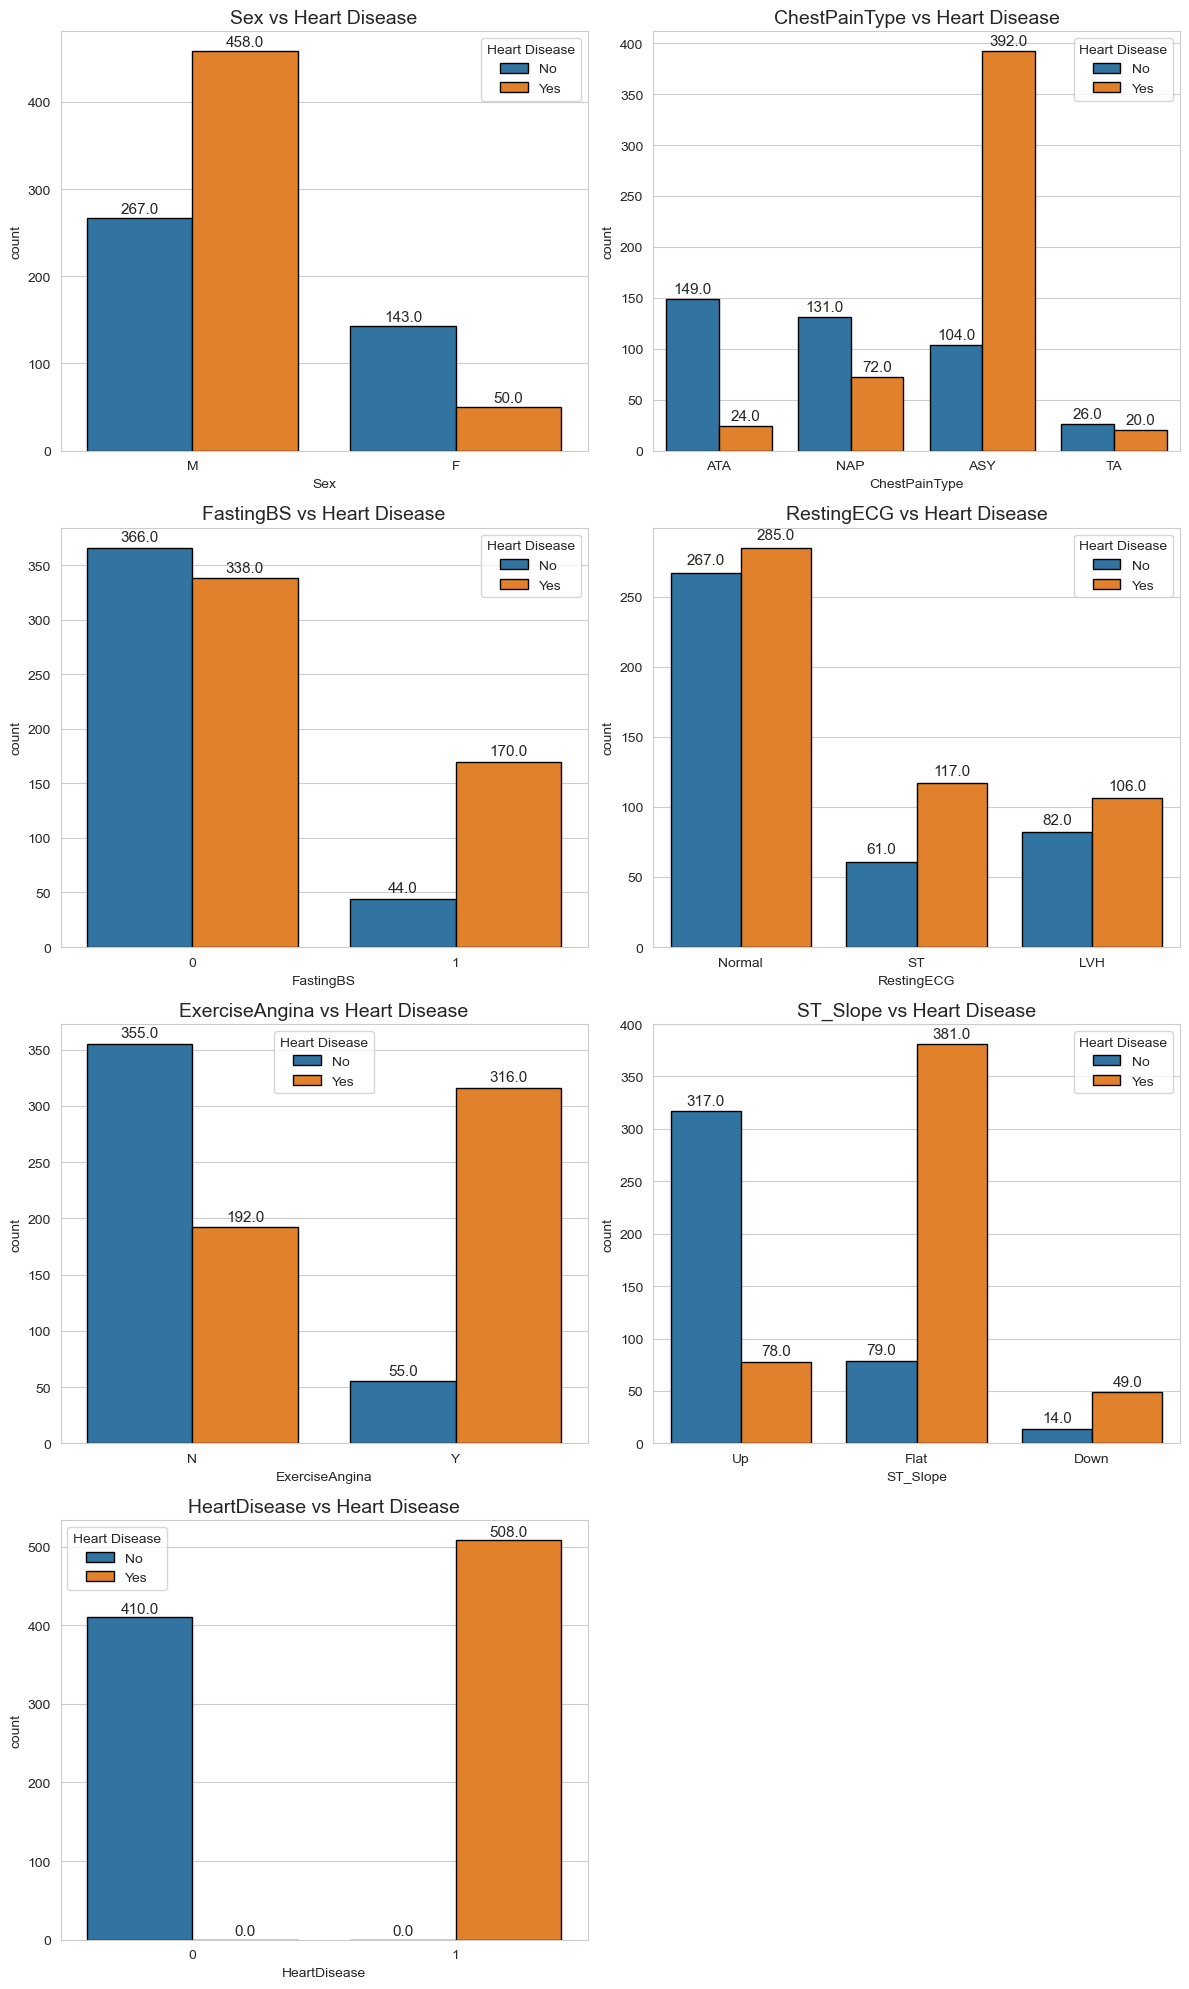

In [77]:
# Plotting distributions of categorical features, separated by those with heart disease and those without.

# Convert categorical features to strings, just to make sure code runs without errors
heart[categorical_features] = heart[categorical_features].astype(str)

# Dynamically calculate grid size
num_features = len(categorical_features)
rows = math.ceil(num_features / 2)  # 2 plots per row
cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through categorical features
for i, feature in enumerate(categorical_features):
    ax = sns.countplot(x=feature, data=heart, hue="HeartDisease", edgecolor='black', ax=axes[i])
    
    # Add text labels on bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 6, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    
    # Set title
    ax.set_title(f'{feature} vs Heart Disease', fontsize=14)
    
    # Adjust legend
    ax.legend(title='Heart Disease', labels=['No', 'Yes'])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

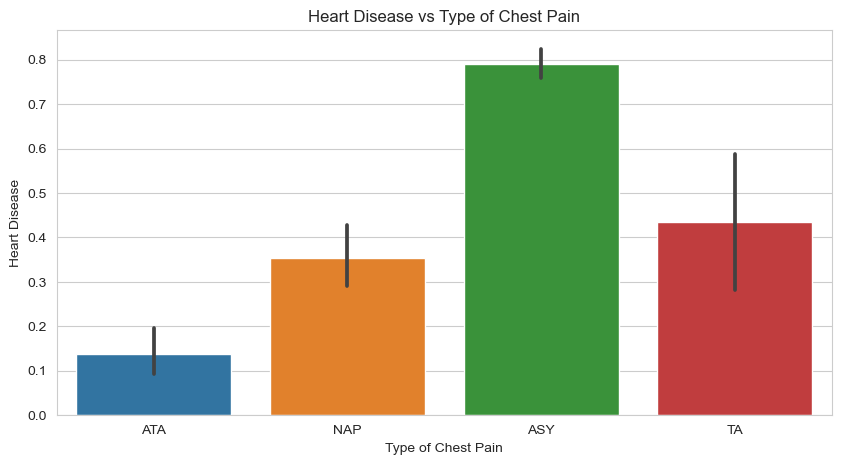

In [55]:
# Exploring distribution of heart disease per type of chest pain

plt.figure(figsize=(10,5))
sns.barplot(x='ChestPainType',y='HeartDisease',data=heart)
plt.title('Heart Disease vs Type of Chest Pain')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Heart Disease')
plt.show()

# ASY immediately stands out. It certainly appears as if it's a telltale sign of heart disease.
# ATA is the chest pain to worry about the least.
# NAP chest pain and TA chest pain have similar heart diease rates, yet the TA chest pain has a larger distribution.

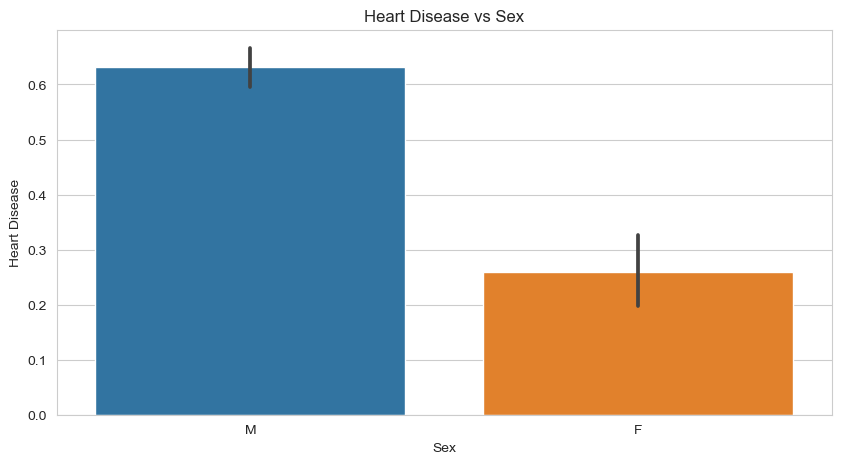

In [56]:
# Exploring distribution of heart disease across genders

plt.figure(figsize=(10,5))
sns.barplot(x='Sex',y='HeartDisease',data=heart)
plt.title('Heart Disease vs Sex')
plt.xlabel('Sex')
plt.ylabel('Heart Disease')
plt.show()

# Men are more susceptible to heart disease than women. Let's see if we can find a reason for that.

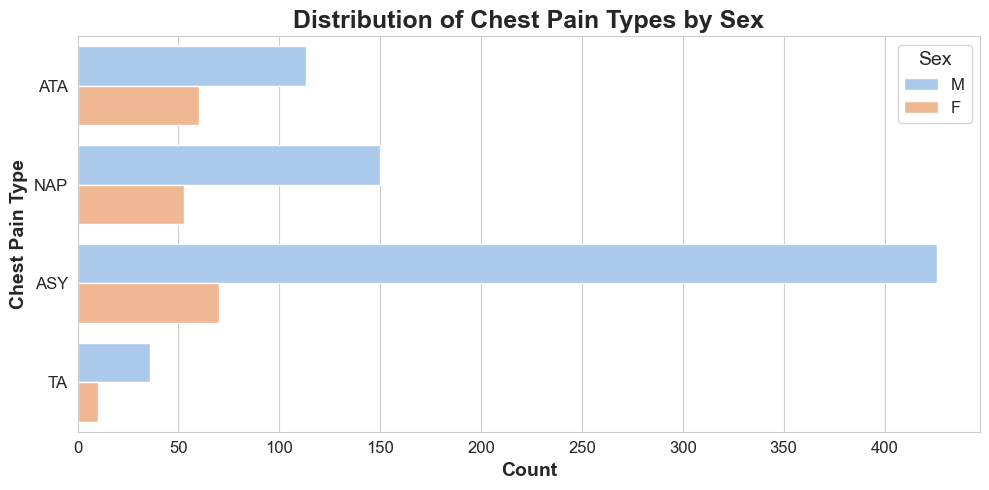

In [57]:
# Checking to see if men are more susceptible to heart disease because they experience chest pains that are 
# more linked to heart disease.

plt.figure(figsize=(10, 5))

ax = sns.countplot(
    data=heart, 
    y='ChestPainType', 
    hue='Sex', 
    palette='pastel'
)

ax.set_title('Distribution of Chest Pain Types by Sex', fontsize=18, fontweight='bold')
ax.set_xlabel('Count', fontsize=14, fontweight='bold')
ax.set_ylabel('Chest Pain Type', fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.legend(title='Sex', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

# That theory rings true. Men experience ASY chest pain signficnatly more than any other chest pain, whereas women experience all chest pains
# at similar rates. And ASY chest pain is the chest pain that's most linked to heart disease.

In [61]:
heart["age_cat"]=pd.cut(heart["Age"],4)
heart.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_cat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(27.951, 40.25]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(40.25, 52.5]"


In [62]:
#Creating regression model

numeric_columns = heart.select_dtypes(include=['number'])

dependent_variable = numeric_columns['HeartDisease']
independent_variables = numeric_columns.drop(columns=['HeartDisease'])

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variable, independent_variables).fit()

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     77.86
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.56e-78
Time:                        19:01:48   Log-Likelihood:                -471.01
No. Observations:                 918   AIC:                             956.0
Df Residuals:                     911   BIC:                             989.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0703      0.157      6.828      0.000       0.763       1.378
Age             0.0020      0.002      1.236      0.217      -0.001       0.005
RestingBP       0.0003      0.001      0.437      0.662      -0.001       0.002
Cholesterol    -0.0006      0.000     -4.805      0.000      -0.001      -0.000
FastingBS       0.1979      0.033      5.923      0.000       0.132       0.263
MaxHR          -0.0054      0.001     -9.131      0.000      -0.007      -0.004
Oldpeak         0.1614      0.013     12.272      0.000       0.136       0.187
==============================================================================
Omnibus:                       46.666   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.105
Skew:                           0.049   Prob(JB):                     7.10e-05
Kurtosis:                       2.300   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

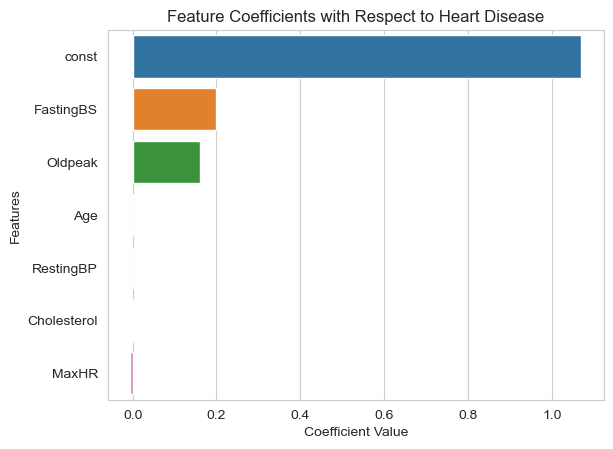

In [63]:
# Plotting coefficient values for each variable, from regression model

coefficients = regression_model.params

sorted_coefficients = coefficients.sort_values(ascending=False)

sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index)
plt.title("Feature Coefficients with Respect to Heart Disease")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# This model may not be too strong? Because only Fasting BS and Oldpeak have a coefficient value that isn't zero.